In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

In [19]:
dataset = pd.read_csv('Mall_Customers.csv')


In [20]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [21]:
X = dataset.iloc[:, [3, 4]].values

In [22]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [23]:
from sklearn.cluster import (KMeans, AffinityPropagation, MeanShift, SpectralClustering,
                             AgglomerativeClustering, DBSCAN, OPTICS, Birch)
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")

In [26]:
# Define class
class AllClusteringModels:
    def __init__(self, X):
        self.X = X

    def kmeans(self, n_clusters=3, random_state=5):
        model = KMeans(n_clusters=n_clusters, random_state=random_state)
        return model.fit_predict(self.X)

    def affinity_propagation(self):
        model = AffinityPropagation()
        return model.fit_predict(self.X)

    def mean_shift(self):
        model = MeanShift()
        return model.fit_predict(self.X)

    def spectral_clustering(self, n_clusters=3, random_state=5):
        model = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=random_state)
        return model.fit_predict(self.X)

    def agglomerative(self, n_clusters=3):
        model = AgglomerativeClustering(n_clusters=n_clusters)
        return model.fit_predict(self.X)

    def dbscan(self, eps=0.5, min_samples=5):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        return model.fit_predict(self.X)

    def optics(self, min_samples=5):
        model = OPTICS(min_samples=min_samples)
        return model.fit_predict(self.X)

    def birch(self, n_clusters=3):
        model = Birch(n_clusters=n_clusters)
        return model.fit_predict(self.X)

# === Dataset ===
# Make sure `X` is defined; this could be from Mall_Customers.csv, for example:
from sklearn.preprocessing import StandardScaler
import pandas as pd
df = pd.read_csv("Mall_Customers.csv")
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values
X = StandardScaler().fit_transform(X)  # Optional but recommended

# === Run Clustering ===
clustering = AllClusteringModels(X)

models = {
    "KMeans": clustering.kmeans(n_clusters=5),
    "Affinity Propagation": clustering.affinity_propagation(),
    "Mean Shift": clustering.mean_shift(),
    "Spectral Clustering": clustering.spectral_clustering(n_clusters=5),
    "Agglomerative": clustering.agglomerative(n_clusters=5),
    "DBSCAN": clustering.dbscan(eps=0.5),
    "OPTICS": clustering.optics(min_samples=5),
    "BIRCH": clustering.birch(n_clusters=5)
}

# === Evaluate Models ===
model_names = []
cluster_counts = []
silhouette_scores = []

for model_name, labels in models.items():
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    score = silhouette_score(X, labels) if n_clusters > 1 else -1
    model_names.append(model_name)
    cluster_counts.append(n_clusters)
    silhouette_scores.append(score)

In [27]:
# === Create Result Table ===
result_df = pd.DataFrame({
    "Model": model_names,
    "Clusters": cluster_counts,
    "Silhouette Score": silhouette_scores
})

# === Find Best Model ===
best_index = result_df["Silhouette Score"].idxmax()
best_model = result_df.loc[best_index, "Model"]

# === Display Results ===
print("\n📊 All Clustering Model Results:")
print(result_df.sort_values(by="Silhouette Score", ascending=False).to_string(index=False))
print(f"\n✅ Best Model Based on Silhouette Score: {best_model}")


📊 All Clustering Model Results:
                Model  Clusters  Silhouette Score
               KMeans         5          0.554657
        Agglomerative         5          0.553809
  Spectral Clustering         5          0.544727
 Affinity Propagation        11          0.432097
                BIRCH         5          0.414450
               DBSCAN         2          0.350446
               OPTICS        11          0.035869
           Mean Shift         1         -1.000000

✅ Best Model Based on Silhouette Score: KMeans


In [28]:
supervised=pd.DataFrame(dataset)

In [29]:
supervised['Cluster_group']=labels

In [30]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


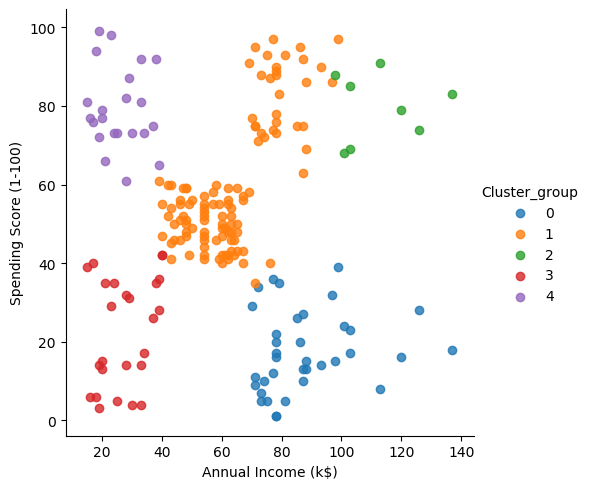

In [31]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], 
                   fit_reg=False, legend=True, legend_out=True)